Markdown basics (http://daringfireball.net/projects/markdown/basics)
# NY Taxi Rides

### Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space. Our subset is 0.5% of all trips, about 850,000 rides. Download the dataset from Cyrille Rossant on GitHub: https://github.com/ipython-books/minibook-2nd-data (https://github.com/ipython-books/minibook-2nd-data) NYC Taxi & Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) NYC Gov data description website (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)


In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Importing csv files "nyc_fare" and "nyc_data"
nyc_fare = pd.read_csv("C:/Users/rober/Downloads/nyc_taxi/data/nyc_fare.csv")
nyc_data = pd.read_csv("C:/Users/rober/Downloads/nyc_taxi/data/nyc_data.csv")               

In [32]:
#remove duplicate rows
nyc_fare = nyc_fare.drop_duplicates()
nyc_data = nyc_data.drop_duplicates()

In [35]:
# For nyc_fare data frame, display data columns, number of rows, variable types, and numeric statistics + categorical variable frequencies.
# Display data columns
print("Columns in nyc_fare:", nyc_fare.columns)
# Display number of rows
print("Number of rows in nyc_fare:", len(nyc_fare))
# Display variable types
print("Variable types in nyc_fare:")
print(nyc_fare.dtypes)
# Display the numberic statistics of variables that are numeric
print("Numeric statistics of nyc_fare:")
print(nyc_fare.describe())
#Display the variables that are categorical
categorical_variables = nyc_fare.select_dtypes(include=['object']).columns.tolist()
categorical_variables
#Count the frequency of unique entries in each of the categorical variables.
for column in categorical_variables:
    print("Frequency of unique entries in", column)
    print(nyc_fare[column].value_counts())

Columns in nyc_fare: Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')
Number of rows in nyc_fare: 846945
Variable types in nyc_fare:
medallion           object
hack_license        object
vendor_id           object
pickup_datetime     object
payment_type        object
fare_amount        float64
surcharge          float64
mta_tax            float64
tip_amount         float64
tolls_amount       float64
total_amount       float64
dtype: object
Numeric statistics of nyc_fare:
         fare_amount      surcharge        mta_tax    tip_amount  \
count  846945.000000  846945.000000  846945.000000  846945.00000   
mean       12.190578       0.320303       0.499305       1.34466   
std         9.514150       0.772642       0.057844       2.09149   
min      -648.420000      -1.000000      -0.500000       0.00000   
25%         6.500000       

In [34]:
# For nyc_data dataframe, display data columns, number of rows, variable types, and numeric statistics + categorical variable frequencies.
# Display data columns
print("Columns in nyc_data:", nyc_data.columns)
# Display number of rows
print("Number of rows in nyc_data:", len(nyc_data))
# Display variable types
print("Variable types in nyc_data:")
print(nyc_data.dtypes)
# Display the numberic statistics of variables that are numeric
print("Numeric statistics of nyc_data:")
print(nyc_data.describe())
#Display the variables that are categorical
categorical_variables = nyc_data.select_dtypes(include=['object']).columns.tolist()
categorical_variables
#Count the frequency of unique entries in each of the categorical variables.
for column in categorical_variables:
    print("Frequency of unique entries in", column)
    print(nyc_data[column].value_counts())

Columns in nyc_data: Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')
Number of rows in nyc_data: 846945
Variable types in nyc_data:
medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object
Numeric statistics of nyc_data:
           rate_code  passenger_count  trip_time_in_secs  trip_distance  \
count  846945.000000    846945.000000       8.469450e+05   8.469

Create Scatterplot for Pickup Locations.For which vendor is it easiest to find a cab?

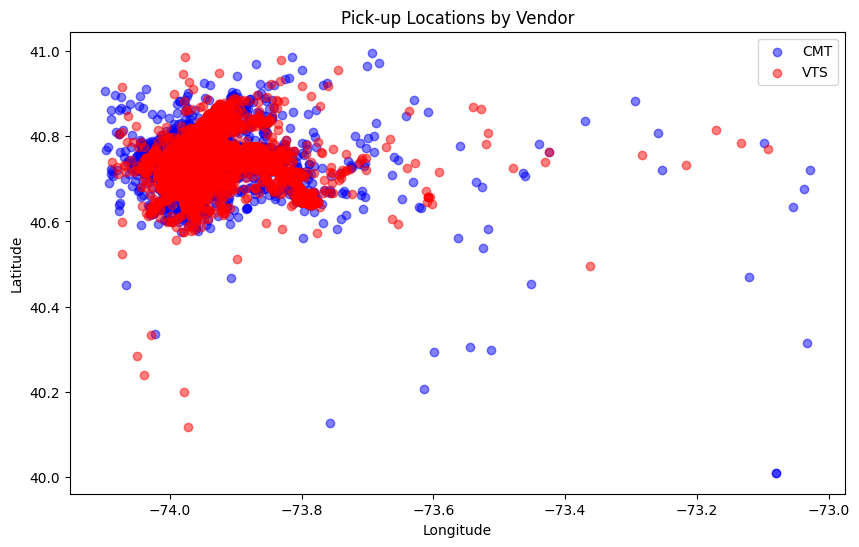

In [14]:
# Display a scatter plot of pick up locationsy  classified by vendor.
vendor_cmt = nyc_data[nyc_data['vendor_id'] == 'CMT']
vendor_vts = nyc_data[nyc_data['vendor_id'] == 'VTS']
plt.figure(figsize=(10, 6))
plt.scatter(vendor_cmt['pickup_longitude'], vendor_cmt['pickup_latitude'], color='blue', alpha=0.5, label='CMT')
plt.scatter(vendor_vts['pickup_longitude'], vendor_vts['pickup_latitude'], color='red', alpha=0.5, label='VTS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pick-up Locations by Vendor')
plt.legend()
plt.show()

Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

In [17]:
p_lng = nyc_data.pickup_longitude
p_lat = nyc_data.pickup_latitude
d_lng = nyc_data.dropoff_longitude
d_lat = nyc_data.dropoff_latitude

In [18]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [21]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [27]:
# Get coordinates for pickup latitude and longtitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
print(py.head())
print(px.head())

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64
0    29.456688
1    29.442916
2    29.452790
3    29.446824
4    29.453826
Name: pickup_longitude, dtype: float64


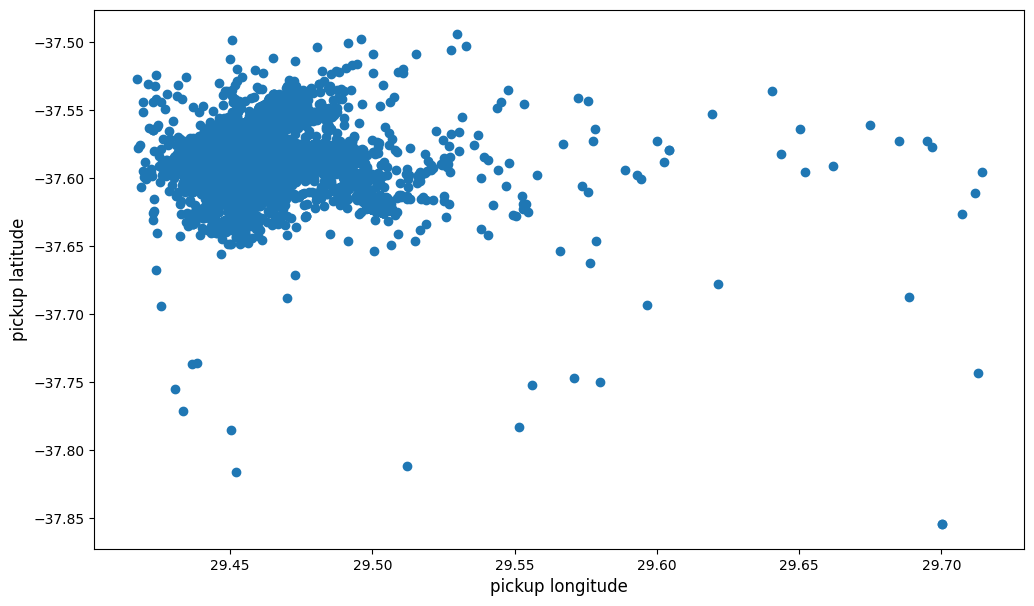

In [30]:
# Display a scatter plot of pick up locations.
plt.figure(figsize=(12,7))
plt.scatter(px, py)
plt.ylabel("pickup latitude", size=12)
plt.xlabel("pickup longitude", size=12)
plt.show()

In [31]:
# Which vendor is it easiest to find a cab?
num_points_cmt = len(vendor_cmt)
num_points_vts = len(vendor_vts)
print(num_points_cmt)
print(num_points_vts)

424678
422267


From counting the number of points of each vendor in the first scatterplot, we can say that the CMT is easier to find a cab since it has more pickup locations than VTS. 

### Customize our plot:
- Make markers smaller
- Make fewer points by making some points transparent
- Zoom in around Manhattan
- Make figure bigger
- Don't display the axes

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to
a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates
the plot with labels, etc. ...

(29.4, 29.55, -37.63, -37.54)

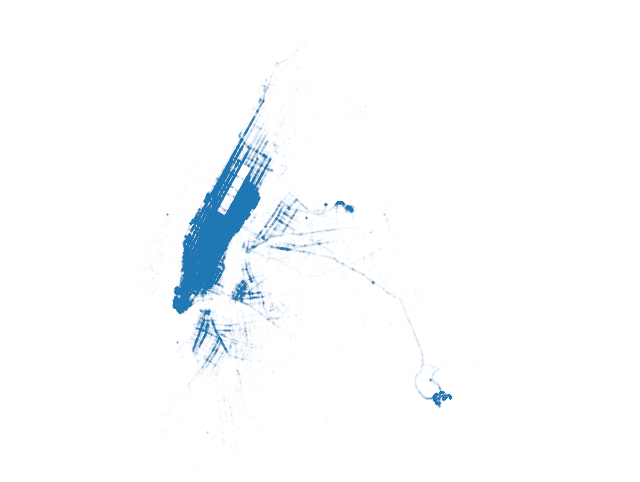

In [36]:
# Specify the figure size
plt.figure(figsize=(8, 6))
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=0.03)
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')

## Display a histogram of the trip distances.
pandas Series hist() draws histogram of the input Series using Matplotlib: documentation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html).

Manhattan Island is 13.4 miles long and 2.3 miles wide.

What is a histogram? (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
numpy linspace() returns evenly spaced numbers over a specified interval.
Parameters: start - interval start; stop - interval stop; num - number of numbers. numpy linspace()
documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)


Display a histogram of trip distances. What is the most common trip distance?

In [37]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

Text(0.5, 1.0, 'Trip Distance Histogram')

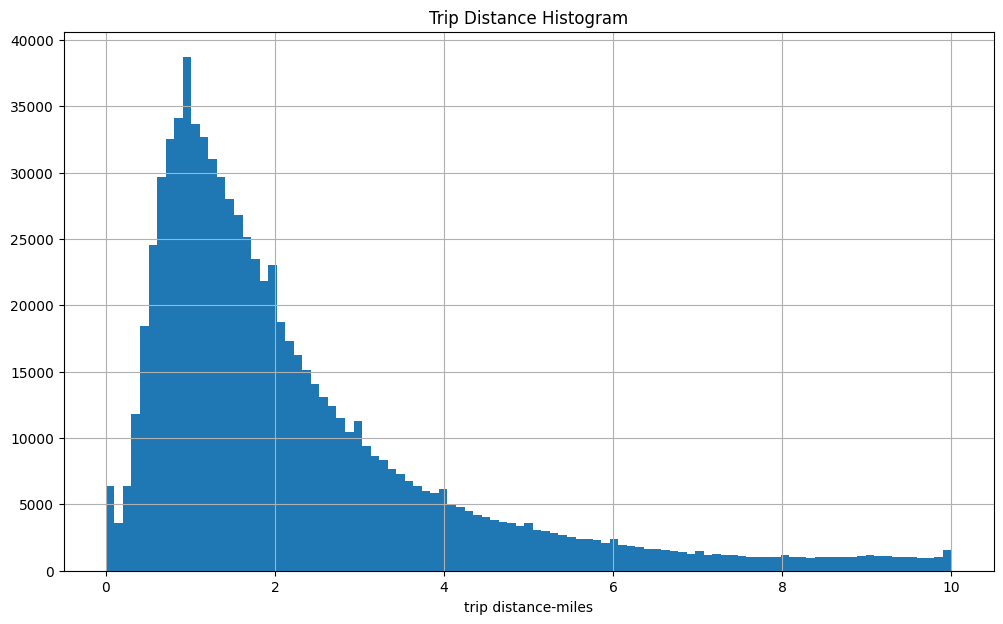

In [40]:
# Display a histogram of trip distance.
plt.figure(figsize=(12, 7))
nyc_data.trip_distance.hist(bins=bin_array)
plt.xlabel('trip distance-miles')
plt.title('Trip Distance Histogram')

In [39]:
# Select the most common trip distance?
most_common_distance = nyc_data["trip_distance"].value_counts().idxmax()
print(most_common_distance)

1.0


From the graph and the output of the code above, we can conclude that the most common trip distance is 1.0 mile.

Display a histogram of the fare total amounts. What can you say about the data?

Text(0.5, 1.0, 'Total Fare Histogram')

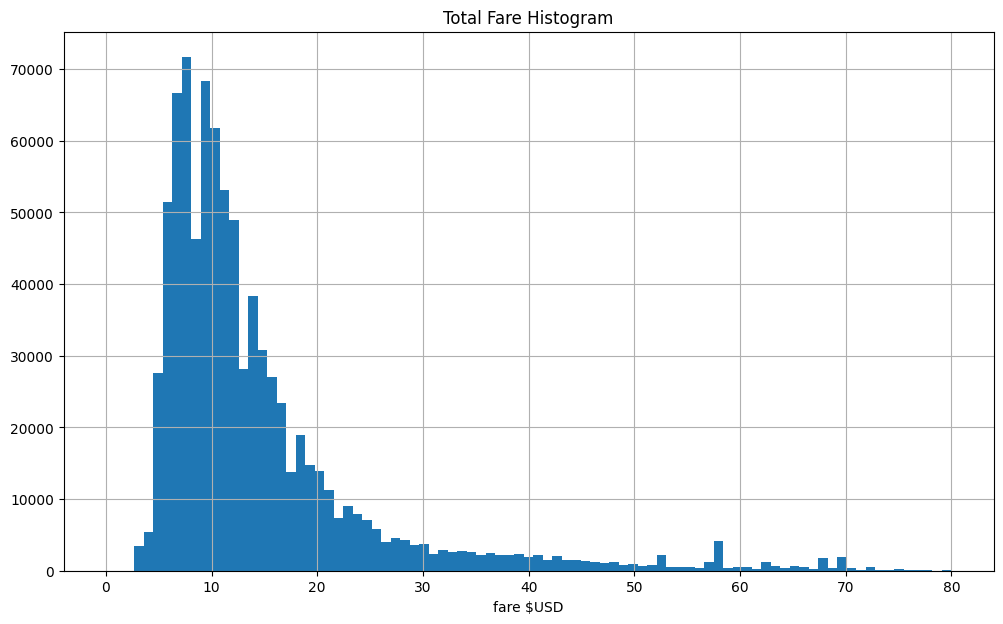

In [41]:
# Display a histogram of fare amount.
plt.figure(figsize=(12, 7))
bin_array = np.linspace(start=0, stop=80, num=90)
nyc_fare.total_amount.hist(bins=bin_array)
plt.xlabel('fare $USD')
plt.title('Total Fare Histogram')

In [43]:
# Select the most common fare?
most_common_fare = nyc_fare["total_amount"].value_counts().idxmax()
print(most_common_fare)

9.0


From the histogram and the above code, we can conclude that the most common fare is 9.0 USD, and that the most commom fare range is between 5-15 USD.

## Filtering with boolean indexing
### Select long rides

How many unusually long trips (of greater than 100 miles) do you see?

In [44]:
# Select the observations of trip distance greater than 100 miles.
nyc_data.loc[nyc_data.trip_distance > 100]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778


There are 4 trips with distance greater than 100 miles.